#H1 Twitter Sentiment Analysis

A simple project to practice NLP principles and sentiment analysis. As well as learn Naive Bayes algorithms. This project implements the Multinomial Naive Bayes model from sklearn.

Data can be found at: https://www.kaggle.com/snap/amazon-fine-food-reviews


In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount( '/content/drive' )

Mounted at /content/drive


In [3]:
#Reading the data into a dataframe
df = pd.read_csv( '/content/drive/MyDrive/Reviews.csv' )

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


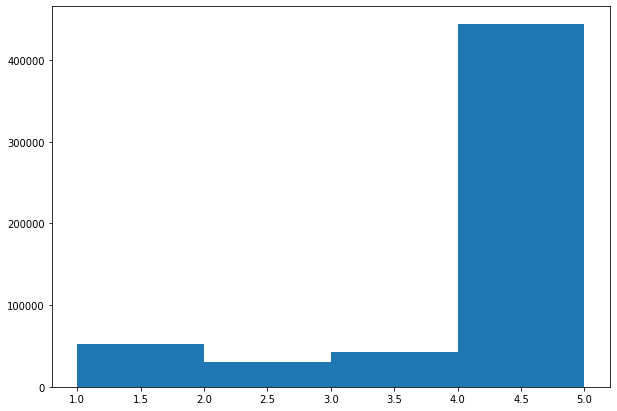

In [5]:
#Plotting the distribution of reviews in the dataset
score = df[ 'Score' ]
fig, ax = plt.subplots( figsize = (10, 7 ) )
ax.hist( score, bins = [ 1, 2, 3, 4, 5 ] )
plt.show()

In [6]:
#Assigns all reviews with a rating less than 3 as negative and more than 3 as positive. Reviews of 3 were ignored.
df = df[ df ['Score' ] !=3 ]
df[ 'sentiment' ] = df[ 'Score' ].apply( lambda rating : + 1 if rating > 3 else -1 )

In [7]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,-1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


In [8]:
#Creates a new dataframe with only the 'Text' and 'Sentiment' columns
dfNew = df[ [ 'Text', 'sentiment' ] ]
dfNew.head()

,Text,sentiment
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,-1
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,-1
4,Great taffy at a great price. There was a wid...,1


In [9]:
#Imports the libraries necessary for vectorizing the text
#Vectorzies the text
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer( r'[a-zA-Z0-9]+' )
cv = CountVectorizer( stop_words='english', ngram_range = (1,1), tokenizer = token.tokenize )
text_counts = cv.fit_transform( dfNew[ 'Text' ] ) 

In [10]:
#Split data into training and test sets
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split( text_counts, dfNew[ 'sentiment' ], test_size=0.25, random_state=5 )

In [11]:
#Imports the model and fits it to the training data
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit( train_features, train_labels )

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [12]:
#Evaluate the model
from sklearn import metrics

predicted = MNB.predict( test_features )
accuracy = metrics.accuracy_score( predicted, test_labels )

print( str( accuracy * 100 ) + '%' )

91.0767264594459%
